In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins=cv2.imread('pennies.jpeg')

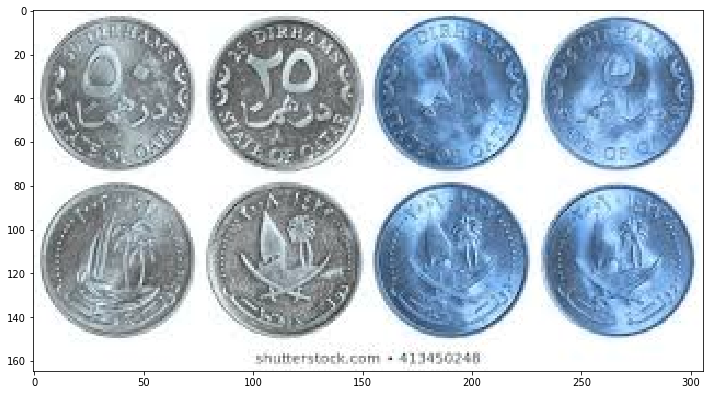

In [4]:
display(sep_coins)

In [5]:
#steps we are gonna do in here 

#median Blur 
#grAyscale
#binry threshold 
#find contours 


In [13]:
sep_blur=cv2.medianBlur(sep_coins,25)


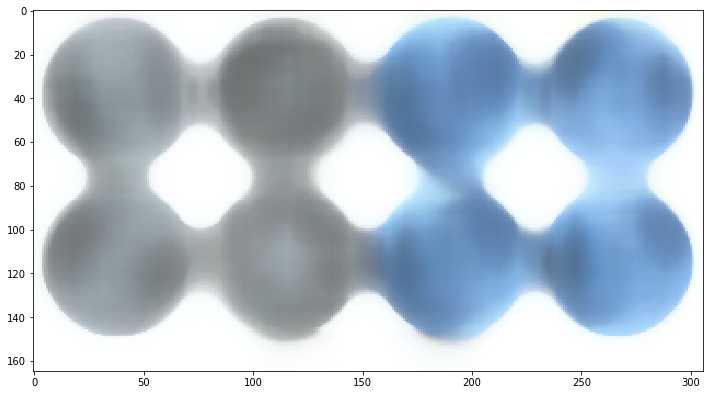

In [14]:
display(sep_blur)

In [15]:
gray_sep_coins=cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

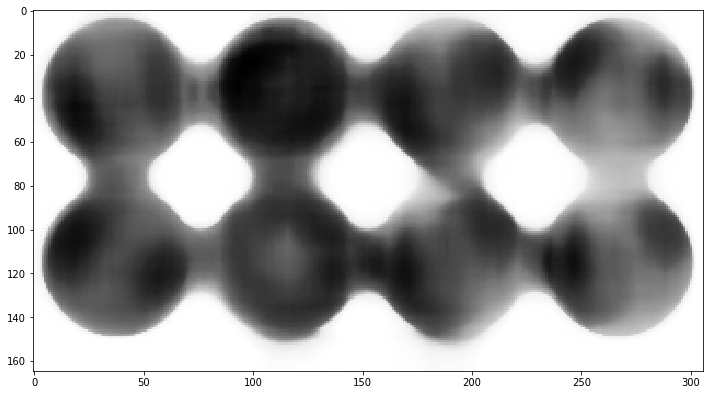

In [16]:
display(gray_sep_coins
       )

In [25]:
ret,sep_thresh=cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

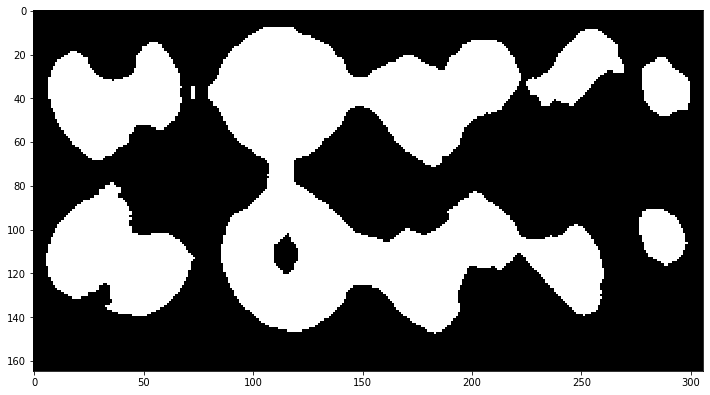

In [26]:
display(sep_thresh)

In [32]:
contours,hierarchy=cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [34]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

NameError: name 'contours' is not defined

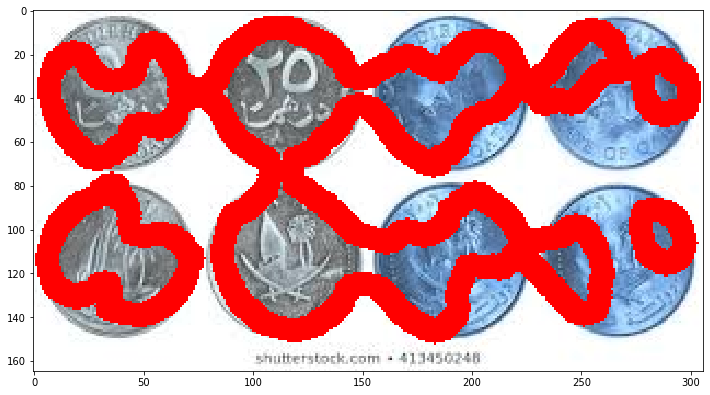

In [41]:
display(sep_coins)

In [4]:
img=cv2.imread('pennies.jpeg')

In [5]:
img=cv2.medianBlur(img,5)

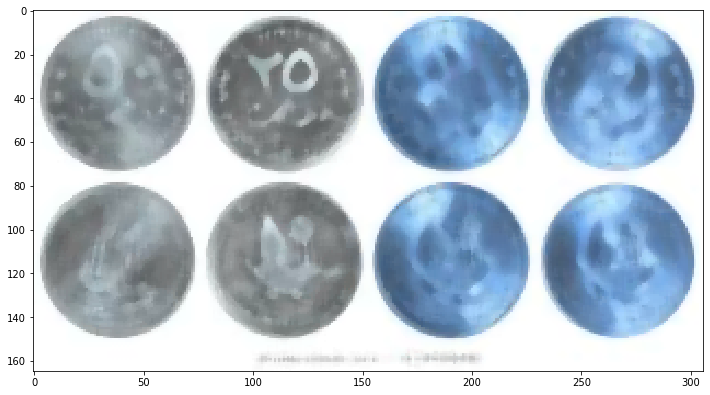

In [6]:
display(img)

In [7]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [11]:
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

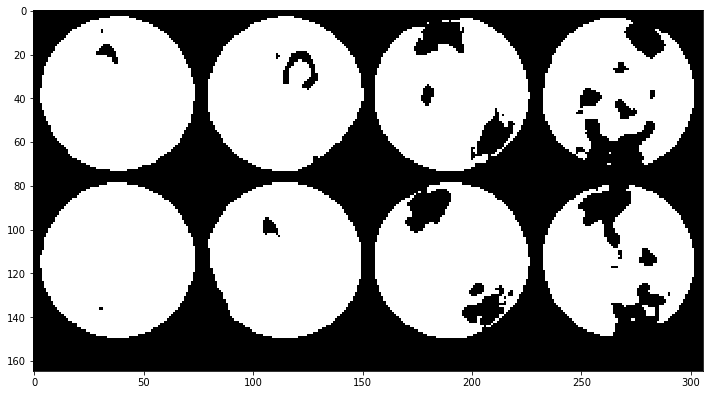

In [12]:
display(thresh) #thresholded image with the use of otsu 

In [13]:
#NOISE REMOVAL (OPTIONAL)
kernel=np.ones((3,3),np.uint8)

In [14]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [16]:
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

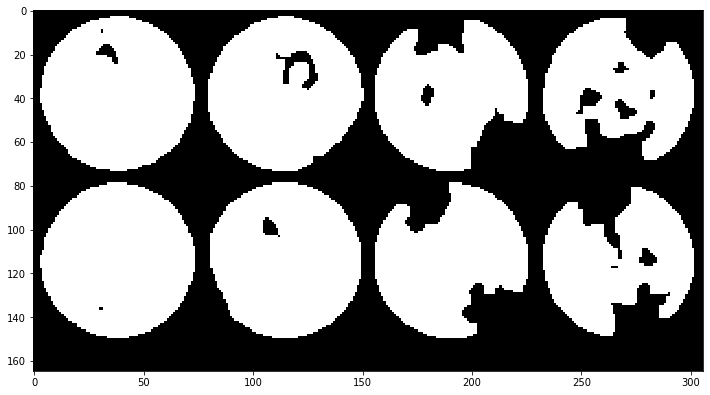

In [17]:
display(opening)

In [19]:
#PERFORM DISTANCE TRANSFORM 
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)

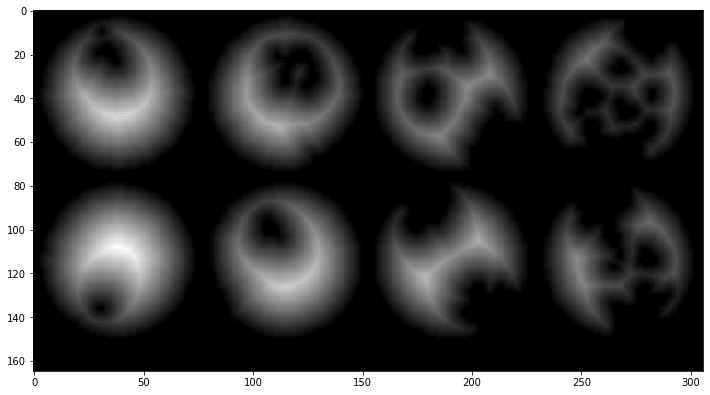

In [20]:
display(dist_transform)

In [22]:
ret,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

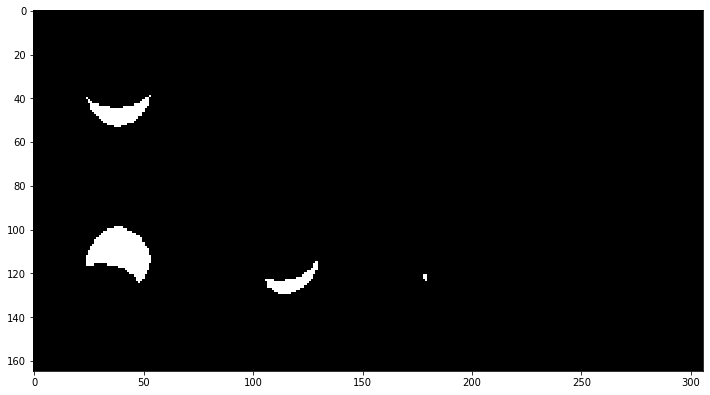

In [23]:
display(sure_fg)

In [24]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)
sure_fg=np.uint8(sure_fg)


In [26]:
unknown=cv2.subtract(sure_fg,sure_fg)

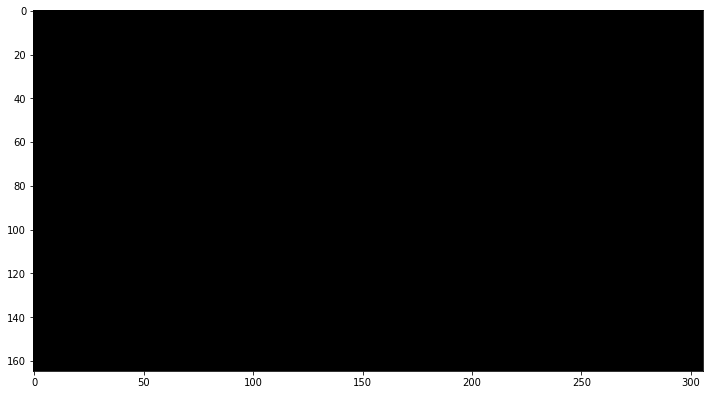

In [27]:
display(unknown)

In [28]:
ret,markers=cv2.connectedComponents(sure_fg)

In [31]:
markers=markers+1  #because we gonna mark the region with unknown 
markers[unknown==255]=0

In [32]:
markers=cv2.watershed(img,markers)

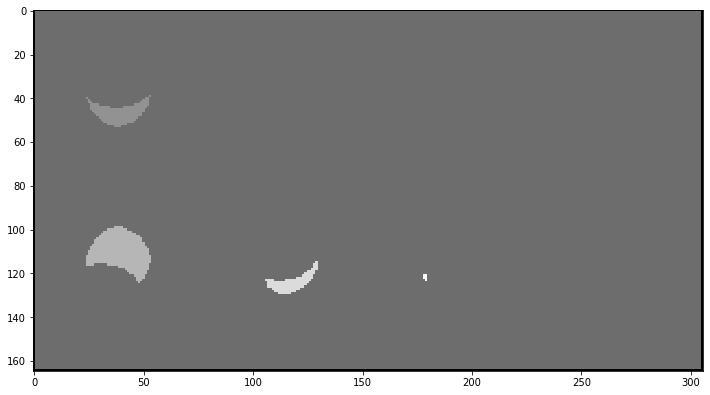

In [33]:
display(markers)

In [36]:
contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [40]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

NameError: name 'sep_coins' is not defined

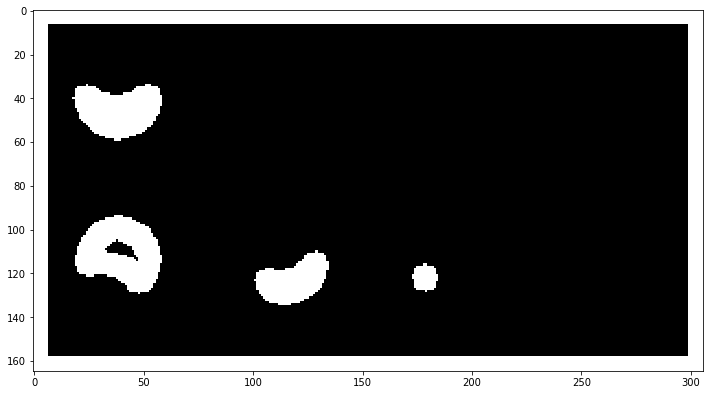

In [39]:
display(markers)